In [1]:
# import the libraries you need, make sure they are installed within your Python env
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import missingno as msno
from scipy.stats import skew, norm
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width = None

这里的数据是好的

In [2]:
ea_ycahrt = pd.read_csv("EA_data/ea_price_data.csv")

In [3]:
ndx_100 = pd.read_csv("NDX100.csv")

In [4]:
spx_data = pd.read_csv("SPX_data.csv")

In [5]:
# 1 year more 2020
tbond_10 = pd.read_csv("I10YTCMR_data.csv")

In [6]:
# 1 year more 2020
ea_pe_ratio = pd.read_csv("EA_data/ea_pe_ratio_data.csv")

In [7]:
time_stamp = pd.date_range(start='1/1/2010', end='12/31/2019')

In [8]:
ea_ycahrt.dtypes
ea_ycahrt.head(10)

Date            object
Open Price     float64
High Price     float64
Low Price      float64
Close Price    float64
Volume           int64
dtype: object

,Date,Open Price,High Price,Low Price,Close Price,Volume
0,2019-12-31,106.58,107.520,106.430,107.51,1436199
1,2019-12-30,108.11,108.370,106.760,106.93,1758520
2,2019-12-27,108.60,108.890,107.800,108.43,1163444
3,2019-12-26,108.56,108.888,108.110,108.51,1676723
4,2019-12-24,107.78,108.870,107.730,108.55,606064
5,2019-12-23,108.27,108.920,107.670,107.79,1622621
6,2019-12-20,108.02,108.450,107.060,107.95,3323415
7,2019-12-19,107.00,107.880,106.635,107.34,1541821
8,2019-12-18,106.00,107.250,105.635,107.08,1573464
9,2019-12-17,105.86,106.225,105.120,105.75,1374329


In [9]:
ea_ycahrt["Date"] =  pd.to_datetime(ea_ycahrt["Date"])

In [10]:
ea_ycahrt.dtypes
ea_ycahrt.head(10)

Date           datetime64[ns]
Open Price            float64
High Price            float64
Low Price             float64
Close Price           float64
Volume                  int64
dtype: object

,Date,Open Price,High Price,Low Price,Close Price,Volume
0,2019-12-31,106.58,107.520,106.430,107.51,1436199
1,2019-12-30,108.11,108.370,106.760,106.93,1758520
2,2019-12-27,108.60,108.890,107.800,108.43,1163444
3,2019-12-26,108.56,108.888,108.110,108.51,1676723
4,2019-12-24,107.78,108.870,107.730,108.55,606064
5,2019-12-23,108.27,108.920,107.670,107.79,1622621
6,2019-12-20,108.02,108.450,107.060,107.95,3323415
7,2019-12-19,107.00,107.880,106.635,107.34,1541821
8,2019-12-18,106.00,107.250,105.635,107.08,1573464
9,2019-12-17,105.86,106.225,105.120,105.75,1374329


In [11]:
# concate timestamp with y-chart
data_joint = pd.DataFrame({"DATE": time_stamp})
data_joint = data_joint.merge(ea_ycahrt, left_on="DATE", right_on="Date", how="left")
data_joint = data_joint.drop("Date", axis=1)

In [12]:
data_joint.dtypes

DATE           datetime64[ns]
Open Price            float64
High Price            float64
Low Price             float64
Close Price           float64
Volume                float64
dtype: object

In [13]:
ndx_100["Period"] = pd.to_datetime(ndx_100["Period"])
data_joint = data_joint.merge(ndx_100, left_on="DATE", right_on="Period", how="left")
data_joint = data_joint.drop("Period", axis=1)

In [14]:
data_joint

,DATE,Open Price,High Price,Low Price,Close Price,Volume,Nasdaq-100 (^NDX) Level
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,17.95,18.235001,17.89,18.15,3853582.0,1886.7000
4,2010-01-05,18.30,18.870000,18.23,18.66,6632992.0,1888.4300
...,...,...,...,...,...,...,...
3647,2019-12-27,108.60,108.890000,107.80,108.43,1163444.0,8770.9791
3648,2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN
3649,2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN
3650,2019-12-30,108.11,108.370000,106.76,106.93,1758520.0,8709.7271


In [15]:
spx_data.head(10)

,Period,S&P 500 (^SPX) Level
0,2019-12-31 00:00:00,3230.781950
1,2019-12-30 00:00:00,3221.291808
2,2019-12-27 00:00:00,3240.020358
3,2019-12-26 00:00:00,3239.907138
4,2019-12-25 00:00:00,3223.380000
5,2019-12-24 00:00:00,3223.375700
6,2019-12-23 00:00:00,3224.009886
7,2019-12-20 00:00:00,3221.224583
8,2019-12-19 00:00:00,3205.368378
9,2019-12-18 00:00:00,3191.142044


In [16]:
spx_data["Period"] = pd.to_datetime(spx_data["Period"])
data_joint = data_joint.merge(spx_data, left_on="DATE", right_on="Period", how="left")
data_joint = data_joint.drop("Period", axis=1)

In [17]:
data_joint

,DATE,Open Price,High Price,Low Price,Close Price,Volume,Nasdaq-100 (^NDX) Level,S&P 500 (^SPX) Level
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,17.95,18.235001,17.89,18.15,3853582.0,1886.7000,1132.985478
4,2010-01-05,18.30,18.870000,18.23,18.66,6632992.0,1888.4300,1136.523386
...,...,...,...,...,...,...,...,...
3647,2019-12-27,108.60,108.890000,107.80,108.43,1163444.0,8770.9791,3240.020358
3648,2019-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3649,2019-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3650,2019-12-30,108.11,108.370000,106.76,106.93,1758520.0,8709.7271,3221.291808


In [18]:
tbond_10.head(10)

,Period,10 Year Treasury Rate (Percent)
0,2020-12-31,0.9300
1,2020-12-30,0.9300
2,2020-12-29,0.9400
3,2020-12-28,0.9400
4,2020-12-24,0.9400
5,2020-12-23,0.9600
6,2020-12-22,0.9300
7,2020-12-21,0.9500
8,2020-12-18,0.9500
9,2020-12-17,0.9400


In [19]:
tbond_10["Period"] = pd.to_datetime(tbond_10["Period"])
data_joint = data_joint.merge(tbond_10, left_on="DATE", right_on="Period", how="left")
data_joint = data_joint.drop("Period", axis=1)

In [20]:
data_joint.head(10)

,DATE,Open Price,High Price,Low Price,Close Price,Volume,Nasdaq-100 (^NDX) Level,S&P 500 (^SPX) Level,10 Year Treasury Rate (Percent)
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,17.95,18.235001,17.89,18.15,3853582.0,1886.70,1132.985478,3.8500
4,2010-01-05,18.30,18.870000,18.23,18.66,6632992.0,1888.43,1136.523386,3.7700
5,2010-01-06,18.65,18.650000,18.06,18.18,5047203.0,1878.42,1137.137830,3.8500
6,2010-01-07,17.91,18.070000,17.78,18.04,5437890.0,1876.72,1141.694928,3.8500
7,2010-01-08,18.12,18.450000,18.03,18.40,4055760.0,1892.59,1144.983058,3.8300
8,2010-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2010-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
ea_pe_ratio.head(10)
ea_pe_ratio["Period"] = pd.to_datetime(ea_pe_ratio["Period"])
data_joint = data_joint.merge(ea_pe_ratio, left_on="DATE", right_on="Period", how="left")
data_joint = data_joint.drop("Period", axis=1)
data_joint.head(100)

,Period,PE Ratio
0,2020-12-31,35.6328
1,2020-12-30,31.6370
2,2020-12-29,31.3363
3,2020-12-28,31.3408
4,2020-12-24,31.5835
5,2020-12-23,31.5167
6,2020-12-22,31.0535
7,2020-12-21,31.4053
8,2020-12-18,31.7617
9,2020-12-17,31.1470


,DATE,Open Price,High Price,Low Price,Close Price,Volume,Nasdaq-100 (^NDX) Level,S&P 500 (^SPX) Level,10 Year Treasury Rate (Percent),PE Ratio
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-04,17.95,18.235001,17.890000,18.15,3853582.0,1886.70,1132.985478,3.8500,NaN
4,2010-01-05,18.30,18.870000,18.230000,18.66,6632992.0,1888.43,1136.523386,3.7700,NaN
...,...,...,...,...,...,...,...,...,...,...
95,2010-04-06,19.10,19.220000,18.850000,19.11,4044996.0,1981.95,1189.441109,3.9800,NaN
96,2010-04-07,19.03,19.240000,18.920000,19.18,3707555.0,1977.30,1182.450438,3.8900,NaN
97,2010-04-08,19.10,19.270000,18.885000,19.19,3213290.0,1980.73,1186.440926,3.9100,NaN
98,2010-04-09,19.20,19.490000,19.155001,19.36,5426718.0,1994.43,1194.367712,3.9000,NaN


<AxesSubplot: >

<AxesSubplot: >

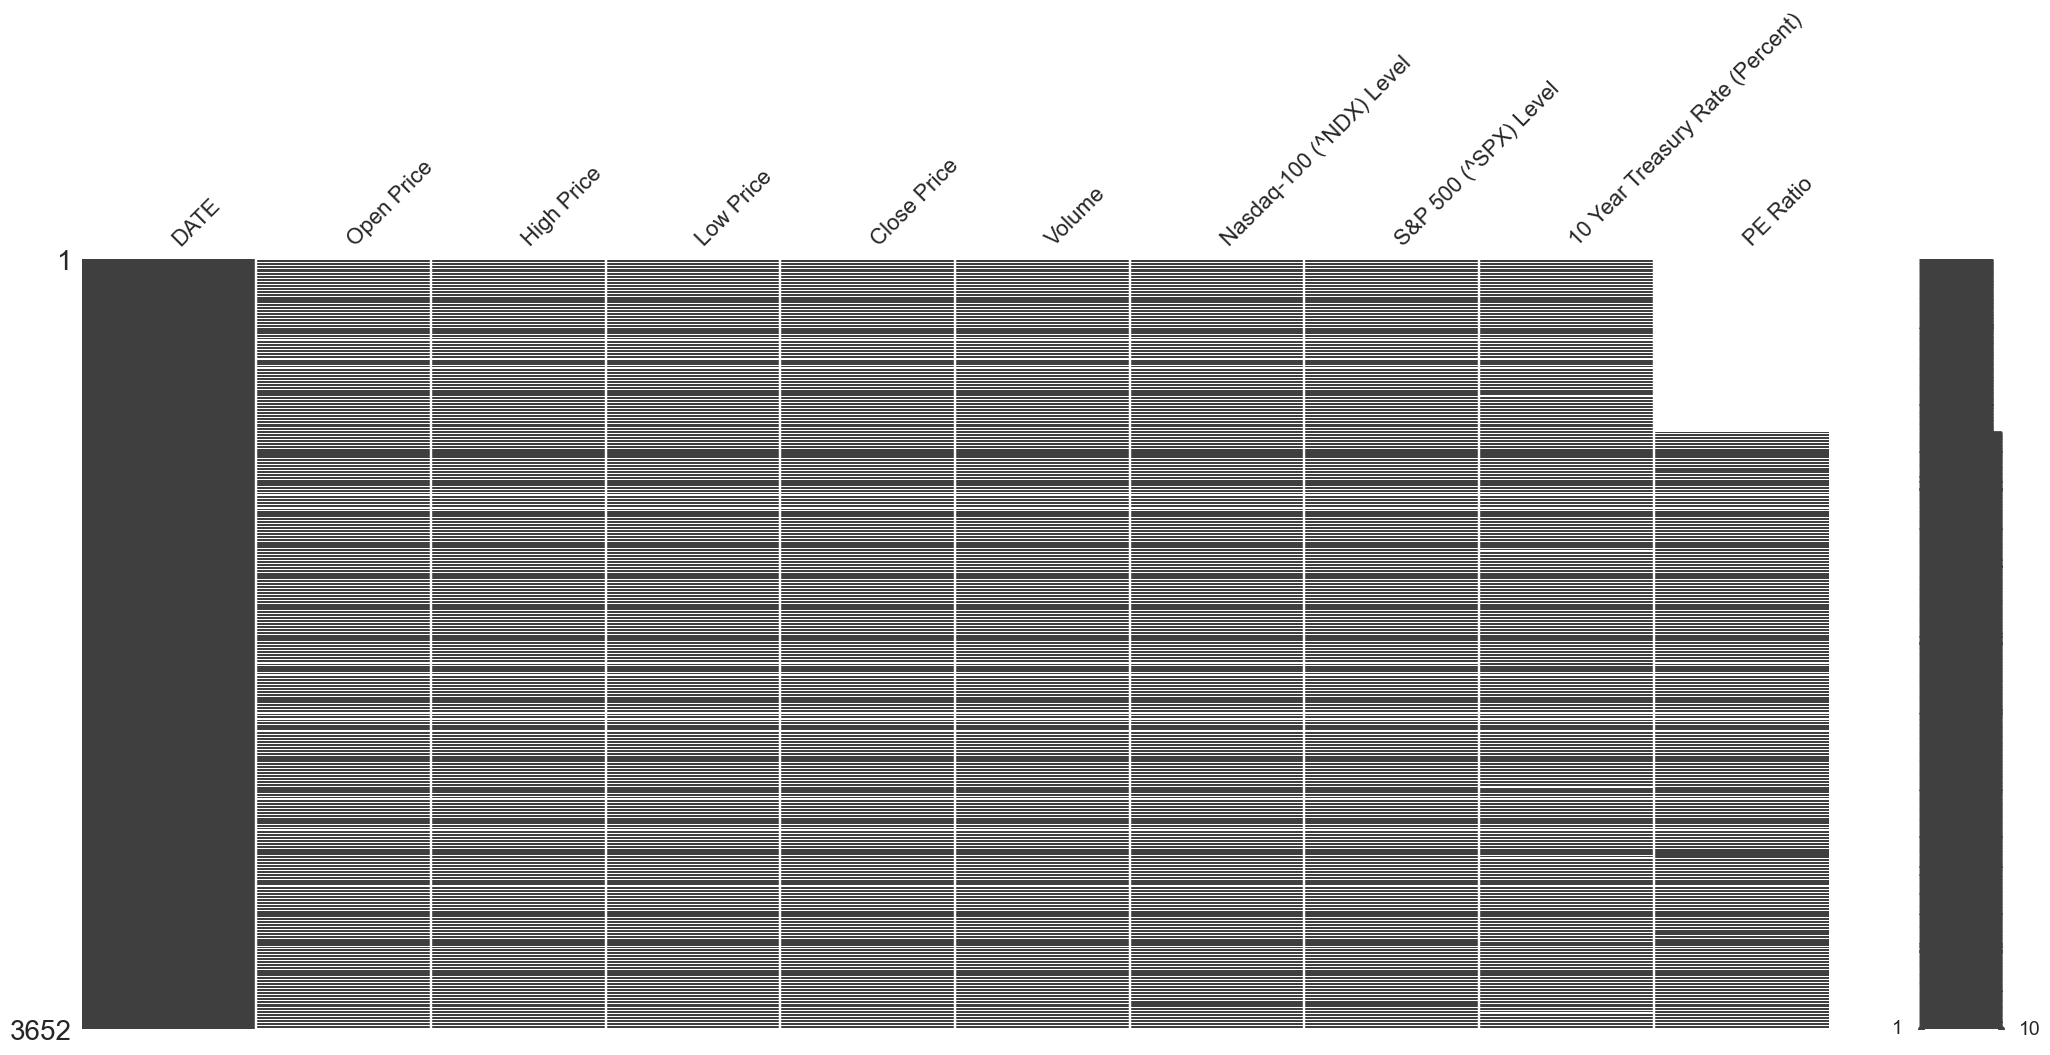

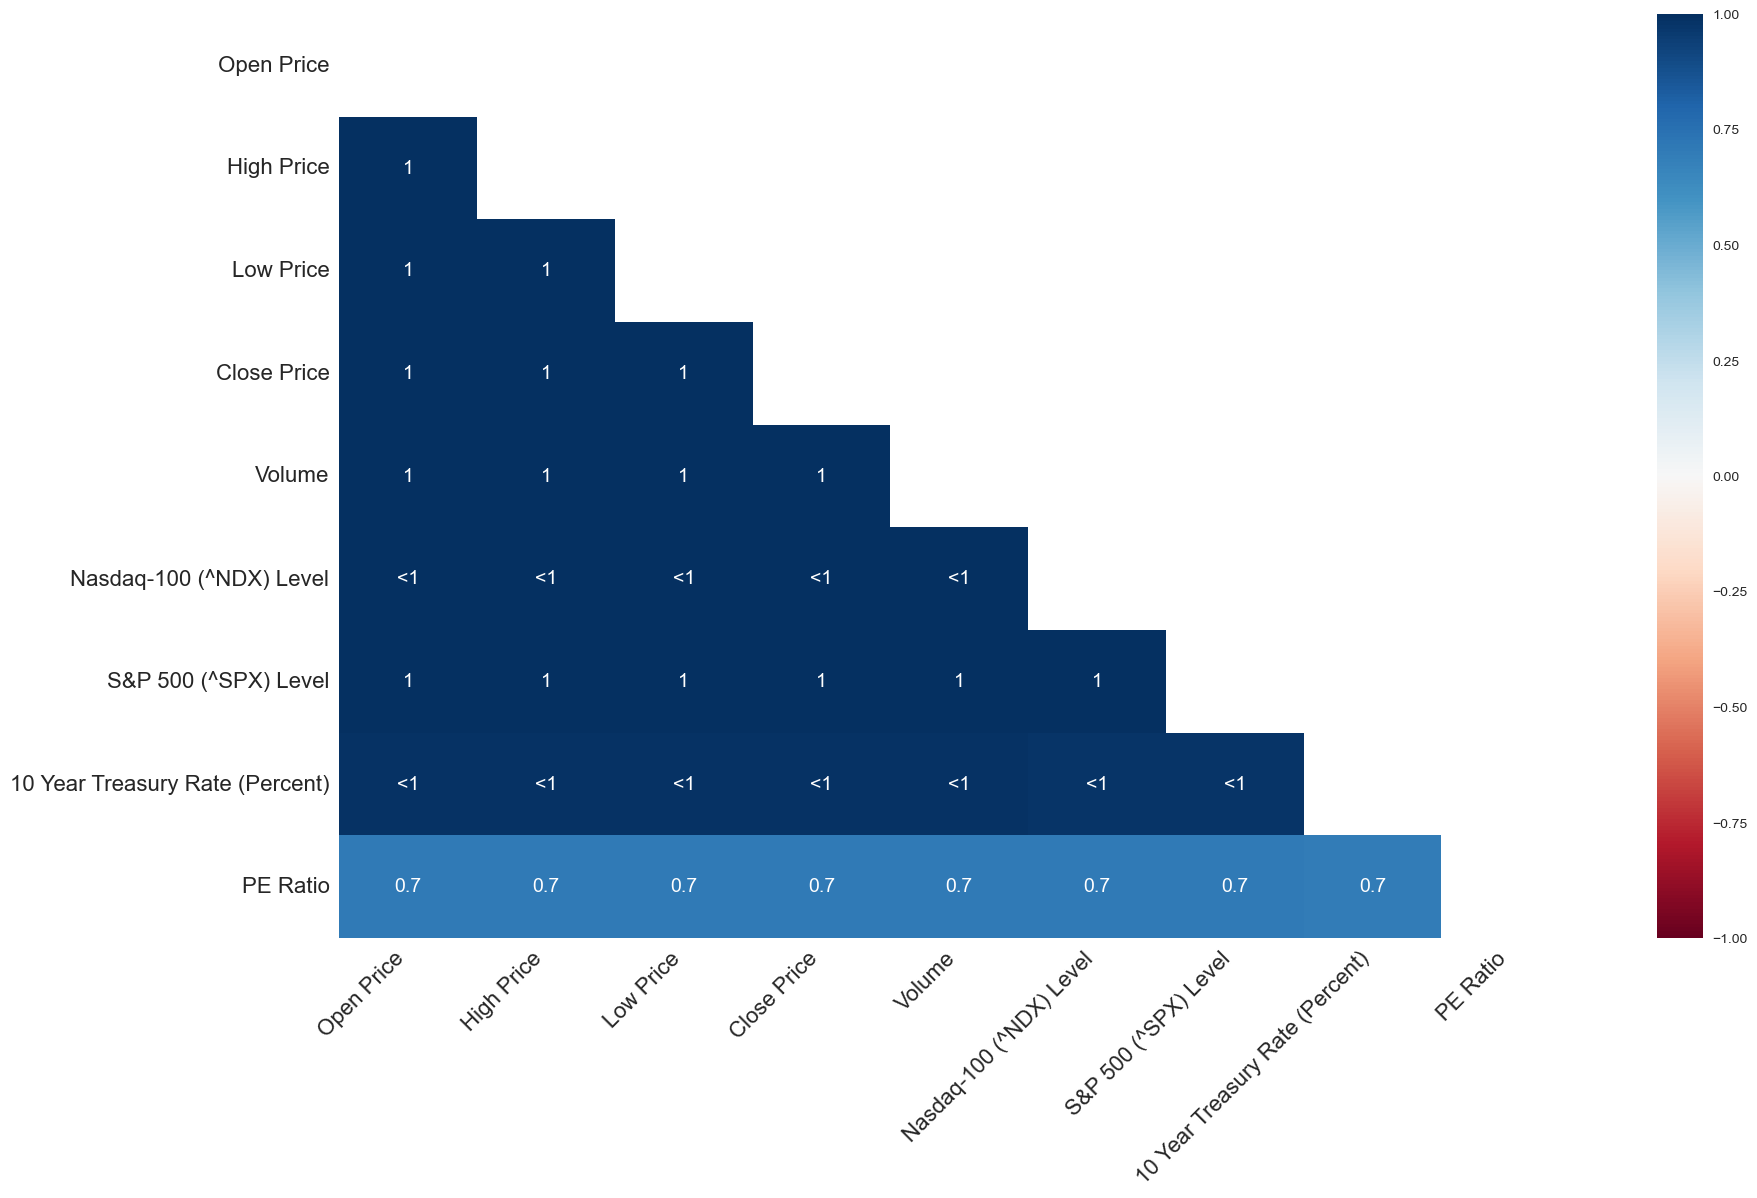

In [22]:
msno.matrix(data_joint)
msno.heatmap(data_joint)

In [23]:
data_joint.to_csv("EA_CLEAN/JOINT_DATA_EA.csv", index=False)